# Climate Change Analysis 
This is a Data Analysis Notebook to explore the data from [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/data#) on 
"Climate Change: Earth Surface Temperature Data Exploring global temperatures since 1750". 

First you have to download the the data containing the following files: 

- GlobalLandTemperaturesByCity.csv	
- GlobalLandTemperaturesByMajorCity.csv	
- GlobalTemperatures.csv
- GlobalLandTemperaturesByCountry.csv	
- GlobalLandTemperaturesByState.csv

In [180]:
# Import Libraries 
import numpy as np 
import pandas as pd 
import os 
import glob
import matplotlib.pyplot as plt 
import scipy.stats as stats
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
def datetime(x):
    return np.array(x, dtype=np.datetime64)
def runmean(x,N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')




def plots_stats(df, city="Hanoi"):
    
    


    df['AverageTemperature'].fillna(df.AverageTemperature.mean(), inplace=True)
    
    df_1800 = df[(datetime(df.dt) > datetime('1810-01-01')) & (datetime(df.dt) < datetime('1910-01-01'))]
    df_1900 = df[(datetime(df.dt) > datetime('1910-01-01'))& (datetime(df.dt) < datetime('2010-01-01'))]
    x_1800_1 = df_1800[df_1800.City == city]
    x_1900_1 = df_1900[df_1900.City == city]
    x_1800 = df_1800[df_1800.City == city].AverageTemperature
    x_1900 = df_1900[df_1900.City == city].AverageTemperature    
    plt.subplot(2, 1,1)
    xx_1800 = seasonal_decompose(x_1800, model='additive',filt=None, period=100)
    plt.plot(datetime(df_1800.dt[xx_1800.trend.index]),xx_1800.trend ,color='blue');
    xx_1900 = seasonal_decompose(x_1900, model='additive',filt=None, period=100)
    plt.plot(datetime(df_1900.dt[xx_1900.trend.index]),xx_1900.trend ,color='red');
    plt.title('Temperature Trend Shift in '+city, fontsize=20)
    plt.subplot(2, 1,2)
    n, x, _ = plt.hist(xx_1800.trend, density=True, alpha=.6, color='blue', label='1810--1910')  
    #plt.plot(x, density(x), alpha=.3, color="blue")
    x1 = x[1:]
    # find the mode of the first histogram

    dx = (x1.max()-x1.min())/20
    maxx = x1[ n == n.max()]-dx
    plt.axvline(x1[ n == n.max()]-dx,color='k')
    n, x, _ = plt.hist(xx_1900.trend, density=True, alpha=.6, color='red', label='1910--1910')  
    plt.legend()
    plt.xlabel('Temperature Trend in degree Celcius', fontsize=10)
    plt.ylabel('Density', fontsize=10)
    #plt.title(city, fontsize=20)

    #
    print("this much of the recent climate is greater than the past climate : ",(xx_1900.trend > maxx[0]).sum() / xx_1900.trend.shape[0])
    #
    
    

In [3]:
#read the GlobalLandTemperaturesByCity.csv
temp_land_cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')
global_t = pd.read_csv('GlobalTemperatures.csv')
# a quick look in the data : 
temp_land_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
#number of nans in percent:
(temp_land_cities.isnull().sum(axis = 0) / temp_land_cities.shape[0] )*100

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [5]:
# Good to know that there are many countries that have cities with the same name like La Paz in Mexico 
# and La Paz in Bolivia therefore I write a function to get read of this problem 
def correct_cities(df):
   


    df['AverageTemperature'].fillna(df.AverageTemperature.mean(), inplace=True)
    

    import time
    import sys

    toolbar_width = len(set(df.City))

    # setup toolbar
    sys.stdout.write("[%s]" % (" " * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    for city in set(df.City):
        dff = df[df.City == city]
        if len(set(dff.Country)) > 1 :
            
            for con in set(dff.Country):
                #print(city+"_"+con)
                df['City'].loc[(df.City == city) & (df.Country == con)] = city+"_"+con
        sys.stdout.write("-")
        sys.stdout.flush()

    sys.stdout.write("]\n") # this ends the progress bar
    
    return dff
                


In [6]:
#df = temp_land_cities.copy()
#df_cor = correct_cities(df)
#df.to_csv('df_cor.csv')


In [7]:
df = pd.read_csv('df_cor_t.csv')

In [8]:
# A test plot for Berlin 
plots_stats(df, city="Boma")

KeyboardInterrupt: 

## Climate shift: 

As it can be seen in the histograms of the trends for the two climatic period, the more recent one is shifted significantly to the right or warmer climate conditions for Berlin air temperature . Note the white space in the time-series plot (dicontinuity in the time-serie) is comming from filtering approach used. 91% of the new climate data is located to the right side of the climate mode for the 1810-1910 period. Mode is the most frequent temperature in the histogram. One could also use the mean but if you have outliers in the data the mean might be influenced. I will calculate this number (percent of the data located to the right side of the mode for the 1810-1910 period) for all cities around the world! 






In [ ]:
#lets do the diff index to see how much of the recent climate 1910 to 2010 is on the right hand of the 
# past climate mode  (1810-1910)
data_final = pd.DataFrame()
data = []
city_name = []
index= []
lati = []
long = []
k = 0


#df['AverageTemperature'].replace(r'^\s*$', np.nan, regex=True, inplace=True)    
df['AverageTemperature'].fillna(df.AverageTemperature.mean(), inplace=True)

df_1800 = df[(datetime(df.dt) > datetime('1810-01-01')) & (datetime(df.dt) < datetime('1910-01-01'))]
df_1900 = df[(datetime(df.dt) > datetime('1910-01-01')) & (datetime(df.dt) < datetime('2010-01-01'))]


for city in set(df.City) : 
    k+=1
    index.append(k)
    city_name.append(city)
    
    #print(city)
    x_1800 = df_1800[df_1800.City == city].AverageTemperature
    x_1900 = df_1900[df_1900.City == city].AverageTemperature
  


    #print((x_1900.isnull()==False).sum())
    if (x_1900.isnull()==False).sum() < 1000 :
        data.append(float('NaN'))
        long.append(float('NaN'))
        lati.append(float('NaN')) 
        continue
    long.append(df_1800[df_1800.City == city].Longitude.values[0])
    lati.append(df_1800[df_1800.City == city].Latitude.values[0])    
    xx_1800 = seasonal_decompose(x_1800, model='additive',filt=None, period=100)
    #plt.plot(datetime(df_1800.dt[xx_1800.trend.index]),xx_1800.trend ,color='blue');
    xx_1900 = seasonal_decompose(x_1900, model='additive',filt=None, period=100)
    #plt.plot(datetime(df_1900.dt[xx_1900.trend.index]),xx_1900.trend ,color='red');
    n, x = np.histogram(xx_1800.trend[xx_1800.trend.isnull()==False],20)  
    #plt.plot(x, density(x), alpha=.3, color="blue")
    x1 = x[1:]
    # find the mode of the first histogram
    dx = (x1.max()-x1.min())/20
    maxx = x1[ n == n.max()]-dx
    #plt.axvline(x1[ n == n.max()]-dx,color='k')
    n, x = np.histogram(xx_1900.trend[xx_1900.trend.isnull()==False],20)  
    #plt.plot(x, density(x), alpha=.3, color="red")
    
    data.append((xx_1900.trend > maxx[0]).sum() / xx_1900.trend.shape[0])
    
# intialise data of lists. 
datas = {'City':city_name, 'val':data, 'lon':long, 'lat':lati} 
  
# Create DataFrame 
df_final = pd.DataFrame(datas)     



In [ ]:
df_final.to_csv('df_final.csv')

In [ ]:
f[-10:]

In [ ]:
# there is still some problems with the data as it seems that all indian cities are alike: 
# I test it as follows: 

#just for 100 first :
for i in f[0:30]:
    print(i)
    sit = df_final[(df_final.val > i-.00000001) & (df_final.val < i+.00000001)].City.values
    if len(sit)>1:
    
        print(sit)
        print('---------')

### that must be usuall because they are cities near to each other and show the same warming trends. 


In [ ]:
df_final.head()

## Now is time for the map plots 


In [116]:
df = pd.read_csv('df_final.csv')

In [117]:
df.head()

,Unnamed: 0,City,val,lon,lat
0,0,Dasoguz,0.635530,59.64E,40.99N
1,1,Boma,0.916597,12.91E,5.63S
2,2,Darjiling,0.916597,87.76E,26.52N
3,3,Montevideo,0.916597,56.43W,34.56S
4,4,Khoy,0.906589,44.75E,37.78N


In [118]:
for city in df['City']:
    
    if df.loc[df["City"]==city].lon.values[0][-1] == 'E' :
        
        df.loc[df["City"]==city,'lon'] =  df.loc[df["City"]==city].lon.values[0][:-1]
    if df.loc[df["City"]==city].lon.values[0][-1] == 'W' :
        df.loc[df["City"]==city,'lon'] = "-"+df.loc[df["City"]==city].lon.values[0][:-1]
    if df.loc[df["City"]==city].lat.values[0][-1] == 'N' :
        df.loc[df["City"]==city,'lat'] = df.loc[df["City"]==city].lat.values[0][:-1]
    if df.loc[df["City"]==city].lat.values[0][-1] == 'S' :
        df.loc[df["City"]==city,'lat'] = "-"+df.loc[df["City"]==city].lat.values[0][:-1]
    

In [119]:
dff = df.copy()
df.loc[df["City"]=='New York','lon'] 

1958    -74.56
Name: lon, dtype: object

In [120]:
import pandas as pd

import os
os.environ["PROJ_LIB"] = "/Users/bijanfallah/anaconda3/share/proj" 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt




In [121]:
#!pip3 install --upgrade matplotlib
#!pip3 install basemap


/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


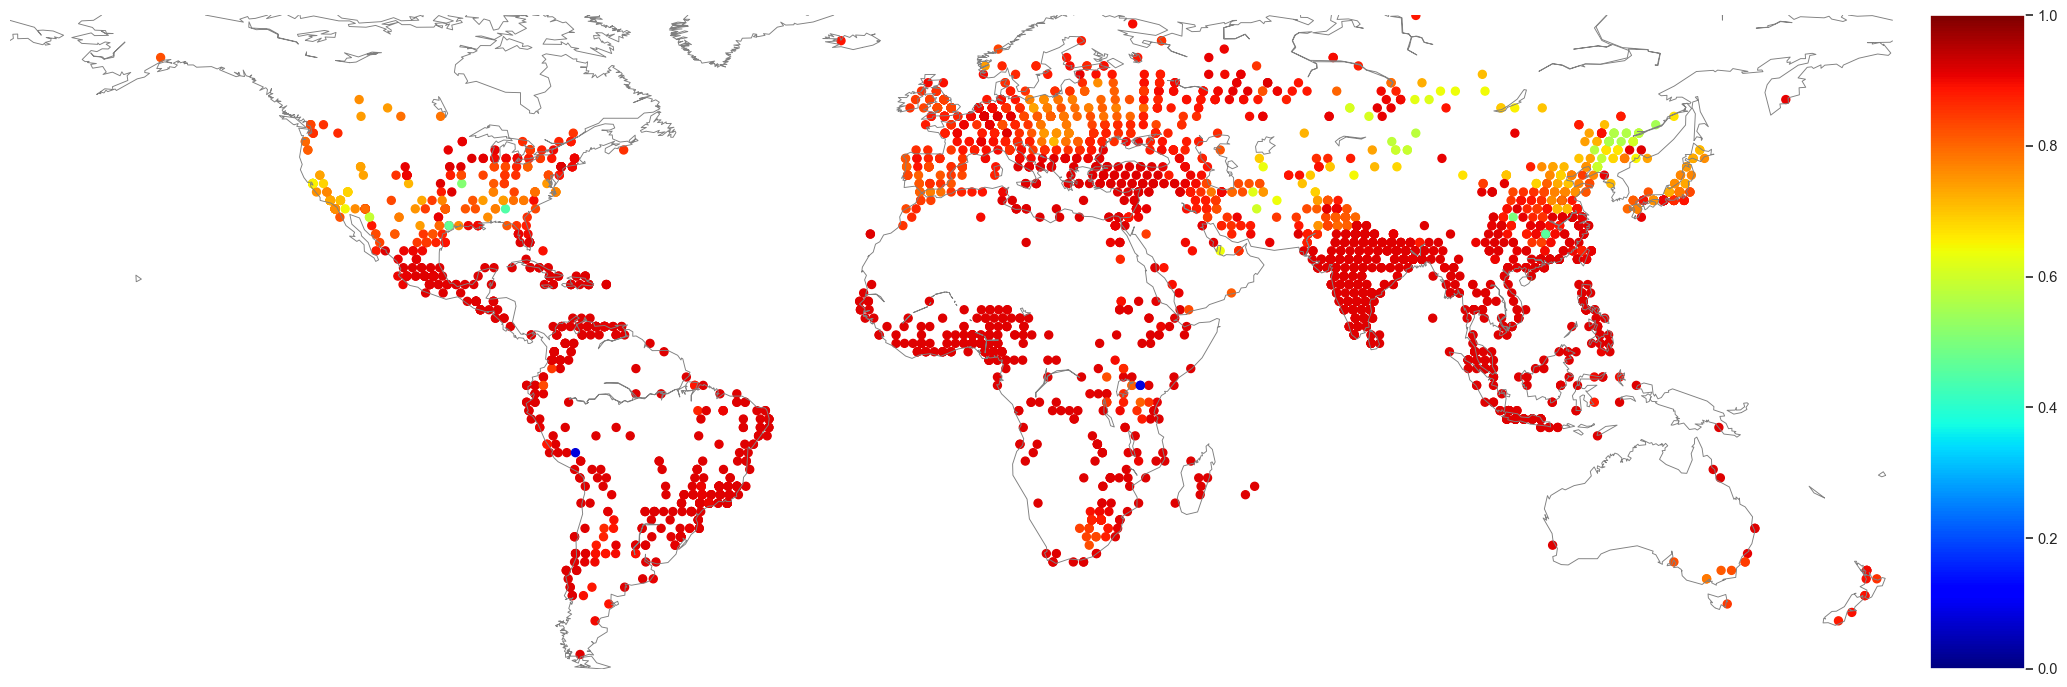

In [147]:
# Set the dimension of the figure
df = dff
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-55,urcrnrlon=180,urcrnrlat=70)
m.drawmapboundary(fill_color='white', linewidth=0)
#m.fillcontinents(color='#99ffff', alpha=0.3)
m.drawcoastlines(linewidth=0.7, color="grey")
# Add a point per position
#df90 = df.drop_duplicates(subset='val', keep='first')
m.scatter(df['lon'].astype(float), df['lat'].astype(float), vmin=0, vmax=1,  alpha=1, c=df['val'], cmap="jet")
m.colorbar()
plt.show()

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


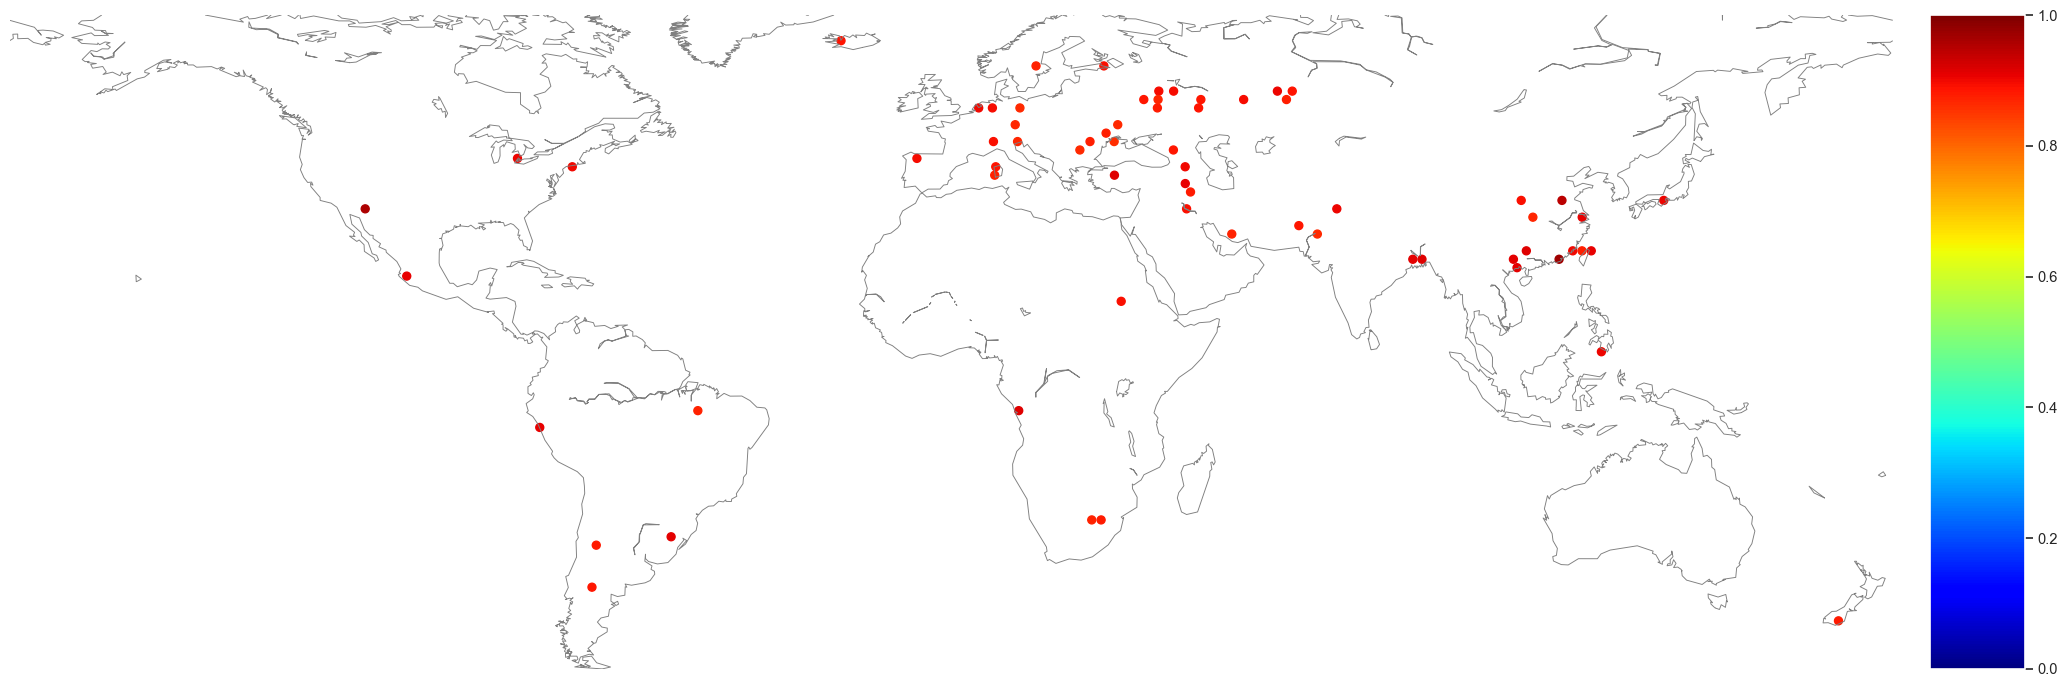

In [148]:
# now just plot the values over the 90% 
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-55,urcrnrlon=180,urcrnrlat=70)
m.drawmapboundary(fill_color='white', linewidth=0)
#m.fillcontinents(color='#99ffff', alpha=0.3)
m.drawcoastlines(linewidth=0.7, color="grey")
# Add a point per position
df90 = df.copy()
df90 = df90.drop_duplicates(subset='val', keep='first')
df90[df90['val']<np.percentile(df90['val'],75)]=np.nan
m.scatter(df90['lon'].astype(float), df90['lat'].astype(float),  alpha=1, vmin=0, vmax=1, c=df90['val'], cmap="jet")
m.colorbar()
plt.show()

In [152]:
co2 = pd.read_csv('export_20200616_0944.csv',sep=";", header=1)

In [153]:
#plt.plot(co2[''],co2['Germany'])

In [154]:

#co2.rename(columns={co2.columns[0]: "year"}, inplace=True)
meann = co2.mean()
meann.index

Index(['Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna Islands', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=220)

In [155]:
#year='1990'
#countries = co2.loc[co2['year']==year].columns[1:]
countries = meann.index

In [156]:
#co2_vals = co2.loc[co2['year']==year].values[0].astype(float)[1:]
co2_vals = meann

In [157]:
data1 = {'country':countries,"co2":co2_vals}
co2_df = pd.DataFrame(data1)

In [158]:
co2_df.head()

,country,co2
Albania,Albania,4.438517
Algeria,Algeria,71.259337
Andorra,Andorra,0.486066
Angola,Angola,11.225937
Anguilla,Anguilla,0.109798


In [159]:
lon_lat = pd.read_csv('contries_lon_lat.csv', sep="\t", header=None)

In [160]:
lon_lat.columns = ['abri','lon','lat','country']
lon_lat.head()
lon_lat.loc[lon_lat['country']=='United States','country']='United States of America'

In [161]:
co2_final = co2_df.join(lon_lat.set_index('country'), on='country')
lon_lat[lon_lat['country']=='United States of America']
#co2_final[co2_final['country']=='United States of America']

,abri,lon,lat,country
227,US,37.09024,-95.712891,United States of America


/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


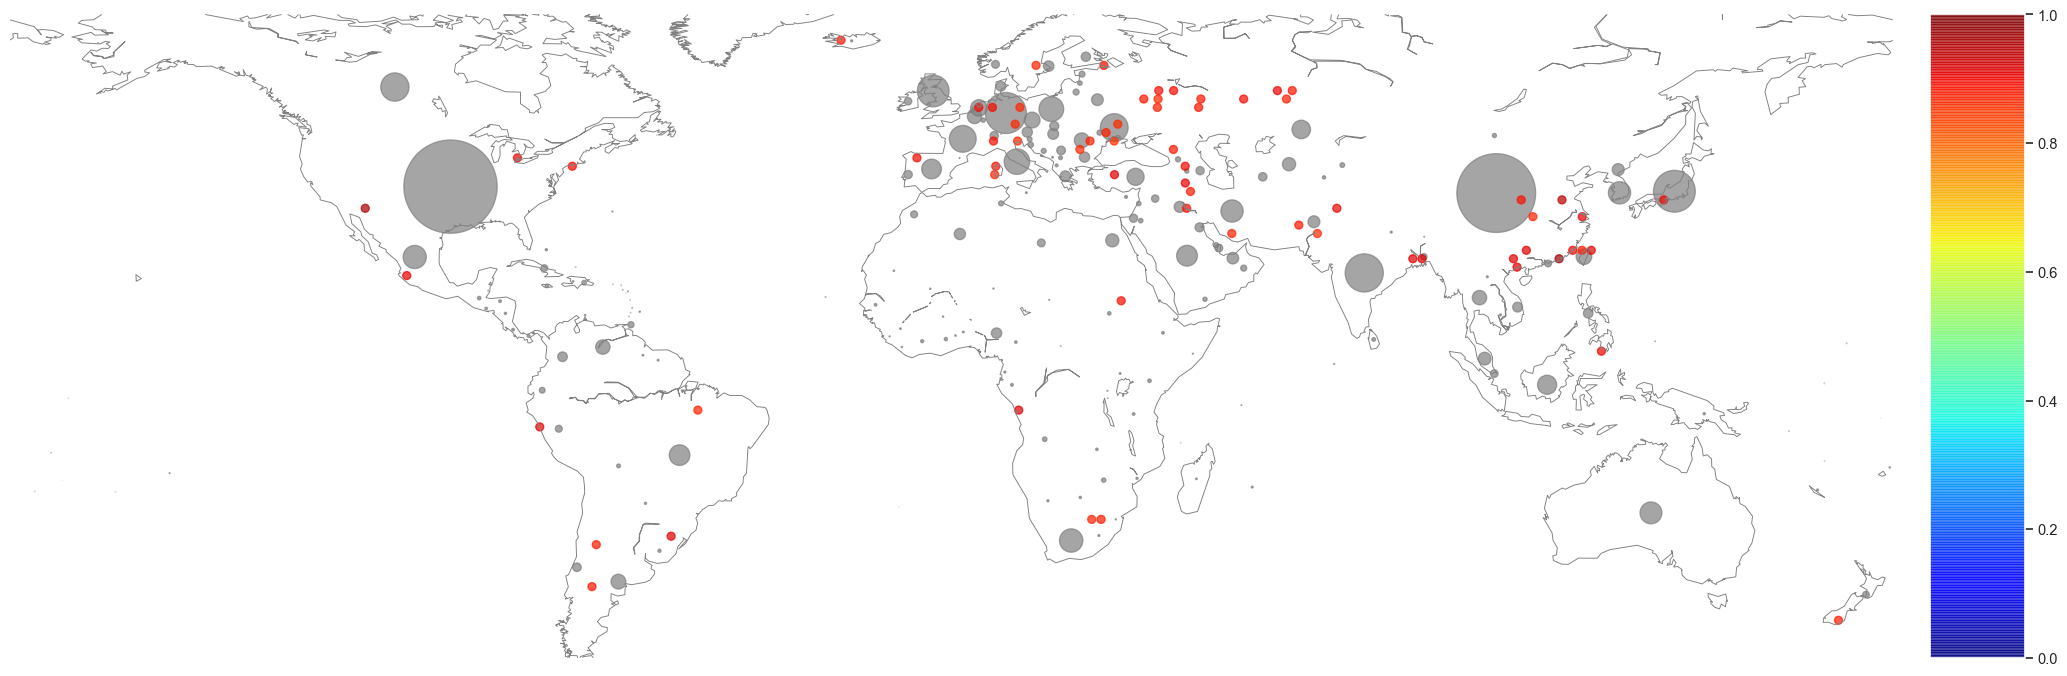

In [162]:
# now just plot the values over the 90% 
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-53,urcrnrlon=180,urcrnrlat=70)
m.drawmapboundary(fill_color='white', linewidth=0)
#m.fillcontinents(color='#99ffff', alpha=0.3)
m.drawcoastlines(linewidth=0.7, color="grey")
# Add a point per position
#df90 = df.copy()
#df90[df90['val']<np.percentile(df90['val'],99)]=np.nan
m.scatter(co2_final['lat'].astype(float), co2_final['lon'].astype(float),  alpha=.71,s=co2_final['co2'],  c='grey')


m.scatter(df90['lon'].astype(float), df90['lat'].astype(float),  alpha=.71, vmin=0, vmax=1, c=df90['val'], cmap="jet")

m.colorbar()

plt.show()

In [163]:
co2_final.sort_values(by=['co2'],  ascending=False)[:20]

,country,co2,abri,lon,lat
United States of America,United States of America,4894.054590,US,37.090240,-95.712891
China,China,3489.750508,CN,35.861660,104.195397
Russian Federation,Russian Federation,1692.673639,NaN,NaN,NaN
Japan,Japan,982.931917,JP,36.204824,138.252924
Germany,Germany,946.764807,DE,51.165691,10.451526
India,India,817.259347,IN,20.593684,78.962880
United Kingdom,United Kingdom,564.572924,GB,55.378051,-3.435973
Canada,Canada,448.421812,CA,56.130366,-106.346771
Ukraine,Ukraine,434.533593,UA,48.379433,31.165580
France,France,404.372810,FR,46.227638,2.213749


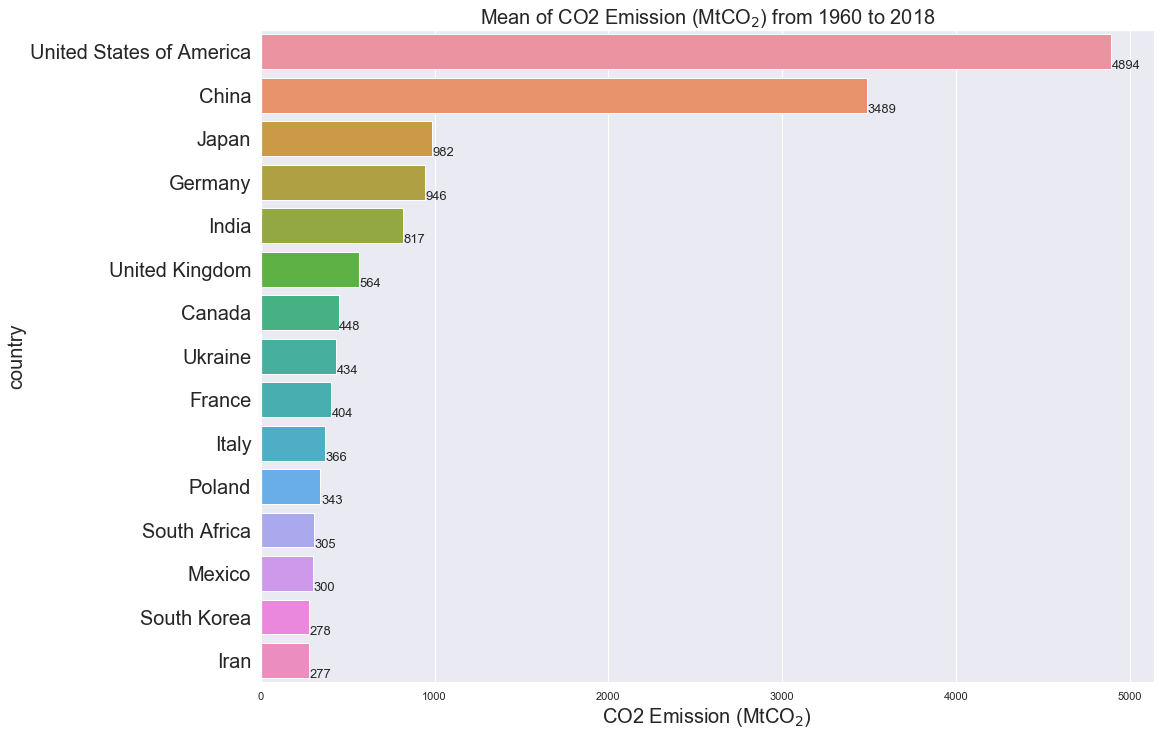

In [164]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set_color_codes("pastel")

f, ax = plt.subplots(figsize=(16, 12))
co2_final.dropna(inplace=True)
ax = sns.barplot(x='co2', y='country',  data=co2_final.sort_values(by=['co2'],  ascending=False)[:15], saturation=0.8)
plt.xlabel('CO2 Emission (MtCO$_2$)', fontsize=20)

# add annotations
[ax.text(p.get_width() + 3, p.get_y() + p.get_height(),
         int(p.get_width()), fontsize=13)
 for p in ax.patches]
ax.set_ylabel("country",fontsize=20)
#ax.set_yticklabels(ax.get_ytickslabels(), size = 15)
_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=20)
plt.title('Mean of CO2 Emission (MtCO$_2$) from 1960 to 2018',fontsize=20)
plt.show()

In [165]:
# plot extrems: 

#df90 = df.copy()
#df90[df90['val']<np.percentile(df90['val'],99)]=np.nan
df90.dropna(inplace=True)
df90.sort_values(by=['val'],  ascending=False)[:20]

,Unnamed: 0,City,val,lon,lat
1085,1085.0,Rongcheng,0.969697,116.21,23.31
992,992.0,Peoria,0.958299,-112.02,32.95
2992,2992.0,Jining,0.949124,116.76,34.56
1,1.0,Boma,0.916597,12.91,-5.63
73,73.0,Liuzhou,0.915763,109.95,24.92
42,42.0,Faridpur,0.914929,90.00,23.31
23,23.0,Eskisehir,0.914095,31.21,39.38
10,10.0,Bhadreswar,0.913261,88.25,23.31
58,58.0,Nanning,0.912427,107.48,23.31
633,633.0,Santa Maria,0.911593,-53.54,-29.74


/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.9165971643035863


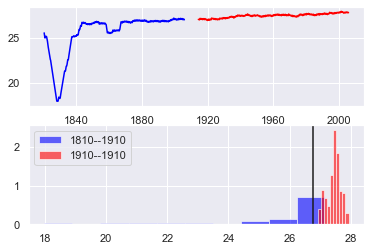

In [166]:
df = pd.read_csv('df_cor_t.csv')
plots_stats(df, city="Si Racha")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.9696969696969697


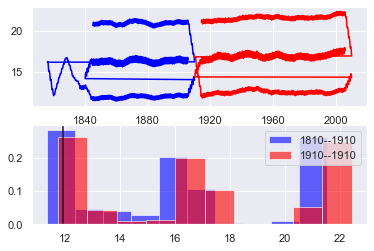

In [167]:
plots_stats(df, city="Rongcheng")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.8849040867389492


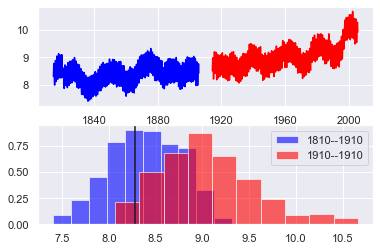

In [168]:
plots_stats(df, city="Khoy")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.9074228523769808


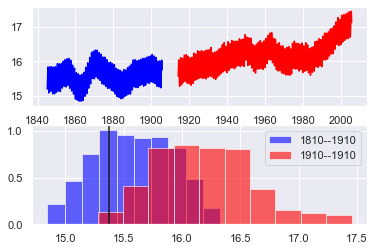

In [169]:
plots_stats(df, city="Shanghai")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.7731442869057548


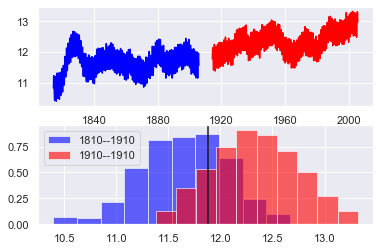

In [170]:
plots_stats(df, city="Washington")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.9057547956630525


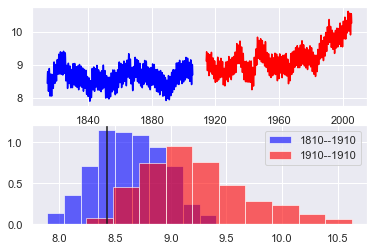

In [171]:
plots_stats(df, city="Berlin")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.8773978315262719


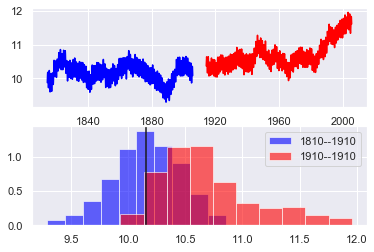

In [172]:
plots_stats(df, city="Paris")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.786488740617181


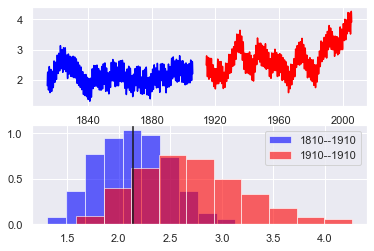

In [173]:
plots_stats(df, city="Oslo")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.16597164303586323


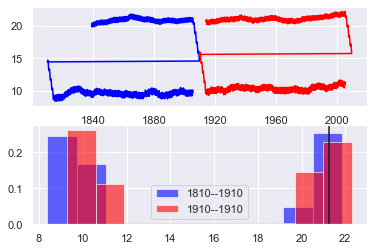

In [174]:
plots_stats(df, city="Peoria")

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.8498748957464554


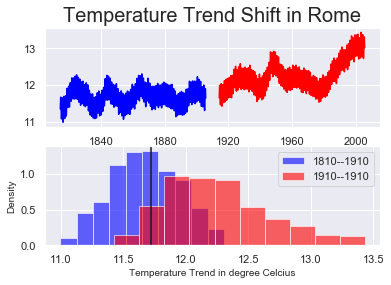

In [181]:
plots_stats(df, city="Rome")